# Bibliotecas

In [3]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Baixandos os dados do dataset AmesHousing

In [4]:
# carregar base de dados
file_path = 'AmesHousing.csv'
housing_data = pd.read_csv(file_path)

# verficar 5 primeiras linhas
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
display(housing_data)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [19]:
# Garantir que não haja valores ausentes nas colunas analisadas
filtered_data = housing_data[['Bedroom AbvGr', 'MS Zoning', 'Overall Cond', 'SalePrice']].dropna()

In [21]:
# Visualizar estatísticas descritivas
print("\nResumo estatístico:")
print(filtered_data[['Bedroom AbvGr', 'Overall Cond', 'SalePrice']].describe())


Resumo estatístico:
       Bedroom AbvGr  Overall Cond      SalePrice
count    2930.000000   2930.000000    2930.000000
mean        2.854266      5.563140  180796.060068
std         0.827731      1.111537   79886.692357
min         0.000000      1.000000   12789.000000
25%         2.000000      5.000000  129500.000000
50%         3.000000      5.000000  160000.000000
75%         3.000000      6.000000  213500.000000
max         8.000000      9.000000  755000.000000


# Estatística Descritiva

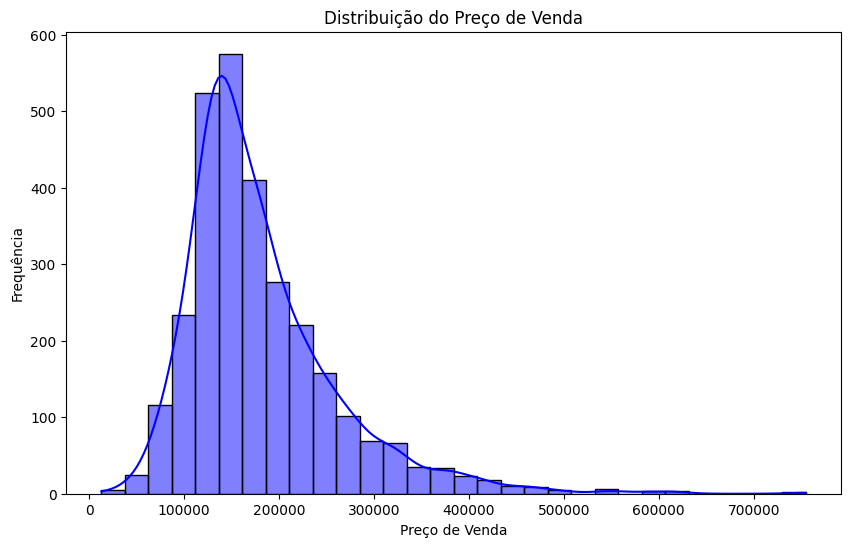

In [8]:
# **1. Distribuição do Preço de Venda (SalePrice)**
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['SalePrice'], kde=True, color='blue', bins=30)
plt.title('Distribuição do Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

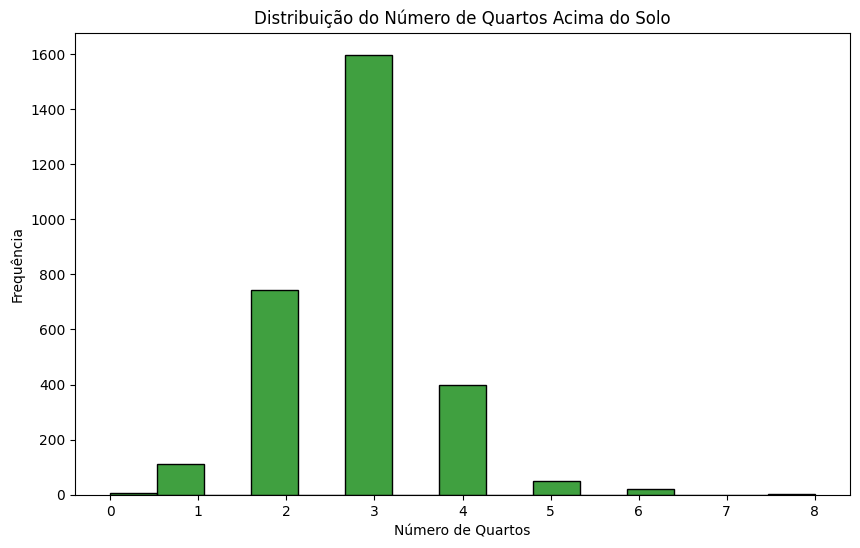

In [9]:
# **2. Distribuição do Número de Quartos (Bedroom AbvGr)**
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Bedroom AbvGr'], kde=False, color='green', bins=15)
plt.title('Distribuição do Número de Quartos Acima do Solo')
plt.xlabel('Número de Quartos')
plt.ylabel('Frequência')
plt.show()

/var/folders/vw/w4z357v90f599jyt6ljmc29w0000gn/T/ipykernel_34516/3296913830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall Cond', data=filtered_data, palette='Set2')


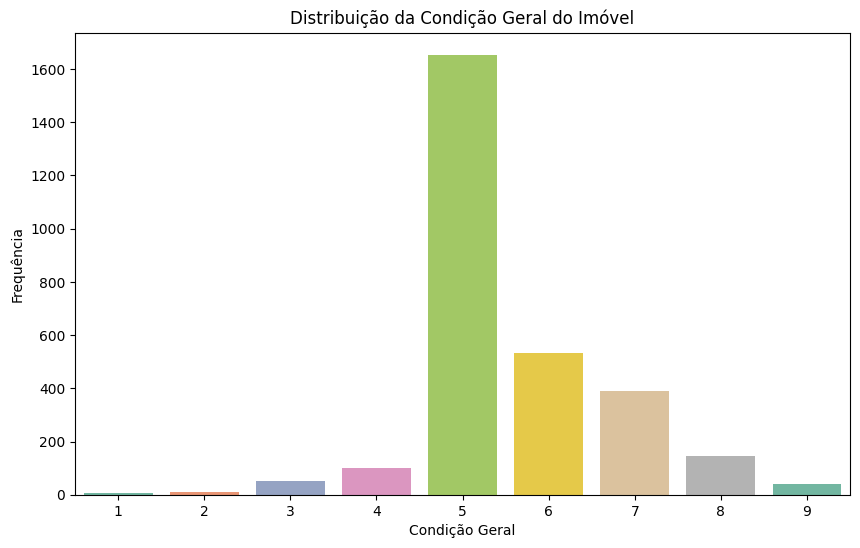

In [10]:
# **3. Distribuição da Condição Geral (Overall Cond)**
plt.figure(figsize=(10, 6))
sns.countplot(x='Overall Cond', data=filtered_data, palette='Set2')
plt.title('Distribuição da Condição Geral do Imóvel')
plt.xlabel('Condição Geral')
plt.ylabel('Frequência')
plt.show()

/var/folders/vw/w4z357v90f599jyt6ljmc29w0000gn/T/ipykernel_34516/3602594626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MS Zoning', y='SalePrice', data=filtered_data, palette='Set3')


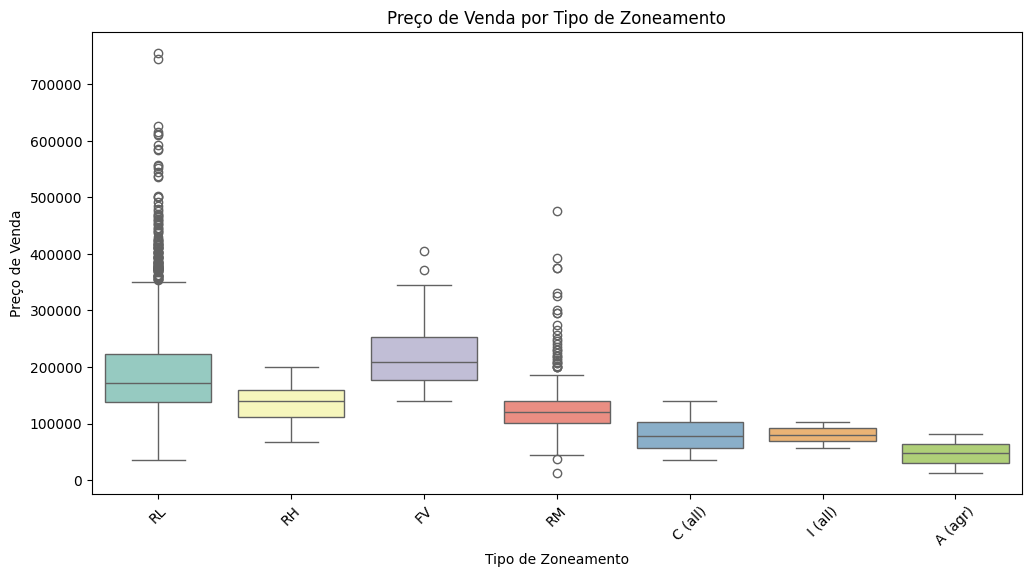

In [11]:
# **4. Preço de Venda por Tipo de Zoneamento**
plt.figure(figsize=(12, 6))
sns.boxplot(x='MS Zoning', y='SalePrice', data=filtered_data, palette='Set3')
plt.title('Preço de Venda por Tipo de Zoneamento')
plt.xlabel('Tipo de Zoneamento')
plt.ylabel('Preço de Venda')
plt.xticks(rotation=45)
plt.show()


Correlação com Preço de Venda:
               SalePrice  Bedroom AbvGr  Overall Cond
SalePrice       1.000000       0.143913     -0.101697
Bedroom AbvGr   0.143913       1.000000     -0.006137
Overall Cond   -0.101697      -0.006137      1.000000


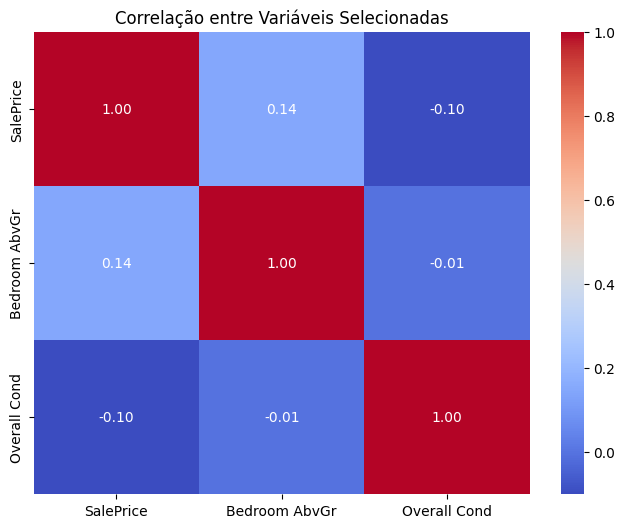

In [12]:
# **5. Correlações com SalePrice**
corr_data = filtered_data[['SalePrice', 'Bedroom AbvGr', 'Overall Cond']].corr()
print("\nCorrelação com Preço de Venda:")
print(corr_data)

# Heatmap das correlações
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis Selecionadas')
plt.show()

# ANOVA

In [17]:
# Função para realizar ANOVA e visualização
def anova_analysis(df, feature, target='SalePrice'):
    groups = df.groupby(feature)[target]
    anova_data = [group for _, group in groups]
    f_stat, p_value = f_oneway(*anova_data)
    
    # Exibir os resultados da ANOVA
    print(f"\nANOVA para {feature}")
    print(f"F-Statistic: {f_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Resultado: Diferenças significativas entre os grupos.")
    else:
        print("Resultado: Não há diferenças significativas entre os grupos.")
    
    # Boxplot para visualizar os dados
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y=target, data=df)
    plt.title(f"Distribuição de {target} por {feature}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.show()


ANOVA para Bedroom AbvGr
F-Statistic: 19.11
P-Value: 0.0000
Resultado: Diferenças significativas entre os grupos.


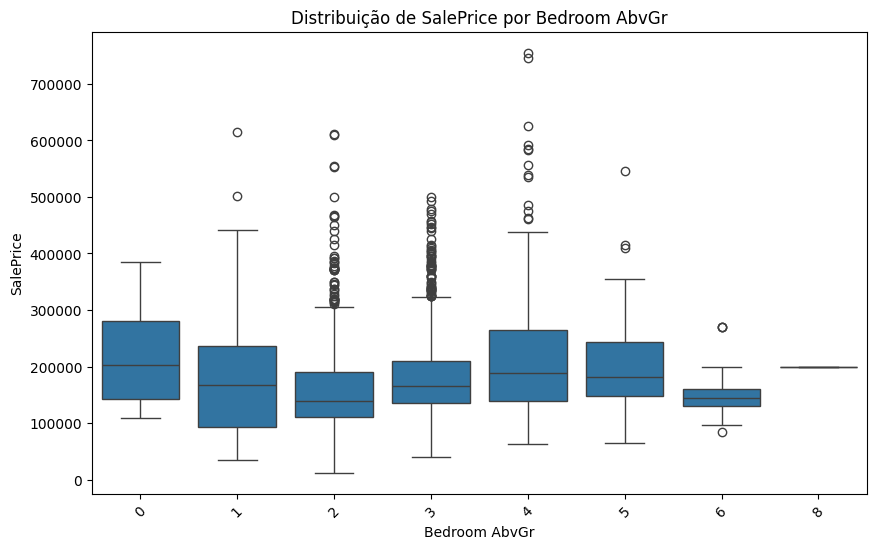

In [18]:
# Realizar ANOVA para Número de quartos
anova_analysis(filtered_data, 'Bedroom AbvGr')  # Número de quartos


ANOVA para MS Zoning
F-Statistic: 63.81
P-Value: 0.0000
Resultado: Diferenças significativas entre os grupos.


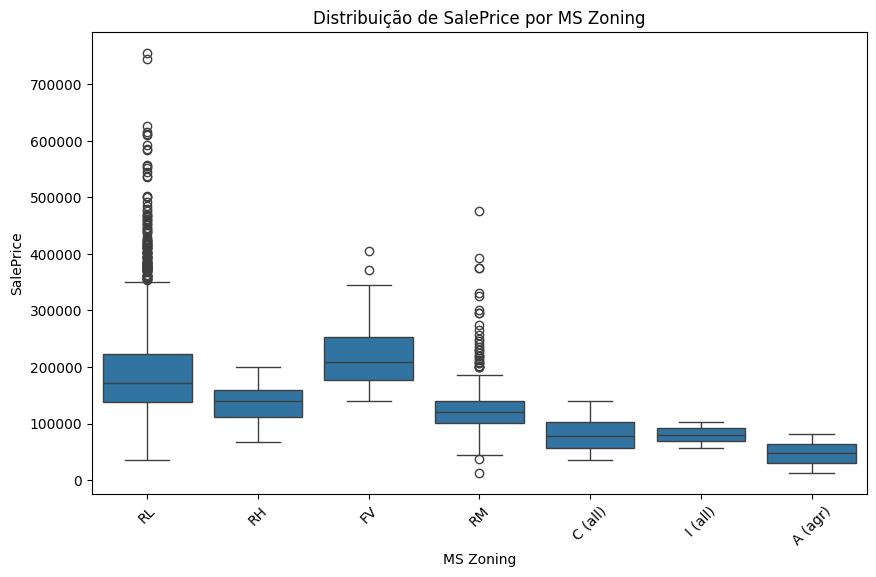

In [42]:
# Realizar ANOVA para Tipo de zoneamento
anova_analysis(filtered_data, 'MS Zoning')      # Tipo de zoneamento


ANOVA para Overall Cond
F-Statistic: 64.58
P-Value: 0.0000
Resultado: Diferenças significativas entre os grupos.


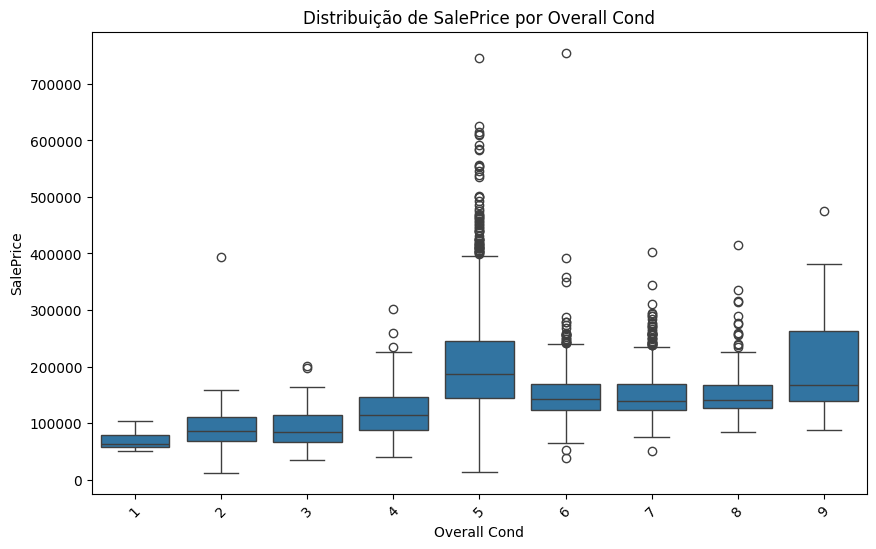

In [43]:
# Realizar ANOVA para Condição geral
anova_analysis(filtered_data, 'Overall Cond')   # Condição geral